In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set(style="whitegrid")

%config IPCompleter.greedy=True

C:\Users\Madhu\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Load the data sales train data

In [2]:
sales_train = pd.read_csv(r'/Users/pallavan/Documents/harrisburg/530/project/competitive-data-science-predict-future-sales/sales_train.csv')
print(sales_train)

               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
5        10.01.2013               0       25     2564      349.00   
6        02.01.2013               0       25     2565      549.00   
7        04.01.2013               0       25     2572      239.00   
8        11.01.2013               0       25     2572      299.00   
9        03.01.2013               0       25     2573      299.00   
10       03.01.2013               0       25     2574      399.00   
11       05.01.2013               0       25     2574      399.00   
12       07.01.2013               0       25     2574      399.00   
13       08.01.2013               

In [3]:
df = pd.DataFrame(sales_train,columns=['date','date_block_num','shop_id','item_id','item_price','item_cnt_day'])

get the unique shop_id's to subset

In [4]:
shops=df['shop_id'].unique().tolist()
print(shops)

[59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26, 4, 6, 2, 3, 7, 0, 1, 16, 15, 8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47, 50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45, 5, 57, 58, 55, 17, 9]


Creating a dictionary to refer to different shops subset of data

In [5]:
shopdf={}
for shop in shops:
    shopdf[shop]=pd.DataFrame(df.loc[df['shop_id'] ==shop])
print(shopdf)

{0:               date  date_block_num  shop_id  item_id  item_price  item_cnt_day
37589   12.01.2013               0        0    11059        73.0             1
37590   22.01.2013               0        0    11059        73.0             1
37591   26.01.2013               0        0    11059        73.0             1
37592   12.01.2013               0        0    11347       170.0             1
37593   22.01.2013               0        0    11347       170.0             1
37594   22.01.2013               0        0    11061       111.0             1
37595   12.01.2013               0        0    11064       110.0             1
37596   12.01.2013               0        0    11065       110.0             1
37597   24.01.2013               0        0    11065       110.0             1
37598   26.01.2013               0        0    11065       110.0             1
37599   30.01.2013               0        0    11065       110.0             1
37600   05.01.2013               0        0    1

Create a dictionary to refer to the aggreagated monthly count data

In [7]:
shopdf_agg={}
for shop in shops:
    s=shopdf[shop].groupby(['date_block_num','item_id'])['item_cnt_day'].agg({'item_cnt_agg':'sum'})
    s['date_block_num'] = s.index.get_level_values('date_block_num') 
    s['item_id'] = s.index.get_level_values('item_id') 
    s.reset_index(drop=True, inplace=True)
    s = s.reindex_axis(['date_block_num','item_id','item_cnt_agg'], axis=1)
    shopdf_agg[shop]=s
print(shopdf_agg)


{0:       date_block_num  item_id  item_cnt_agg
0                  0       32             6
1                  0       33             3
2                  0       35             1
3                  0       43             1
4                  0       51             2
5                  0       61             1
6                  0       75             1
7                  0       88             1
8                  0       95             1
9                  0       96             1
10                 0       98            25
11                 0      111             1
12                 0      149             3
13                 0      151             1
14                 0      153             1
15                 0      198             1
16                 0      210             2
17                 0      282             1
18                 0      306             1
19                 0      351             1
20                 0      421             1
21                 0      43

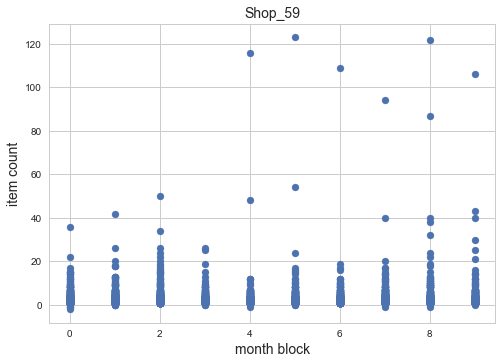

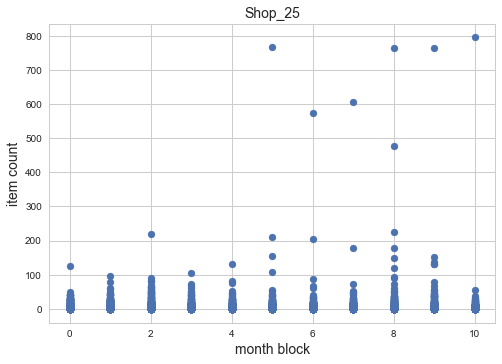

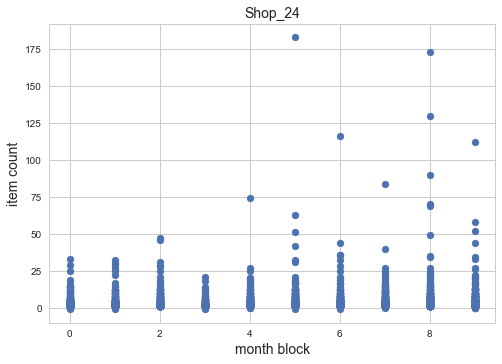

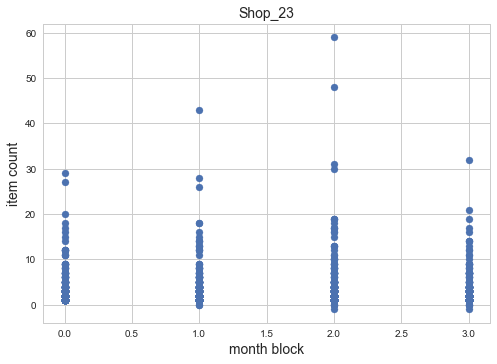

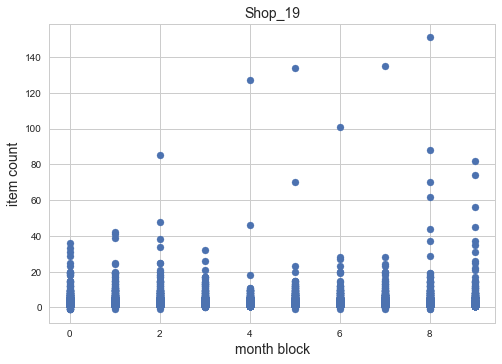

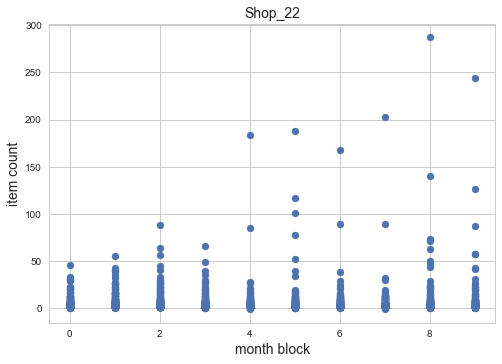

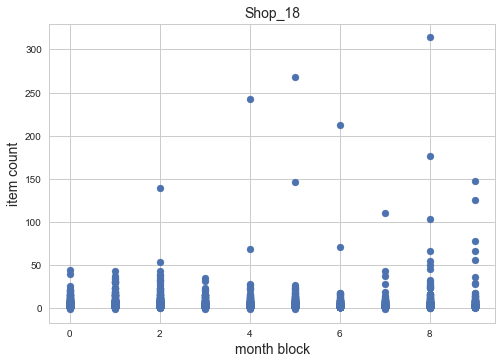

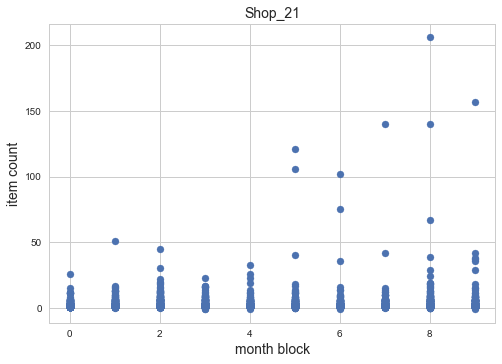

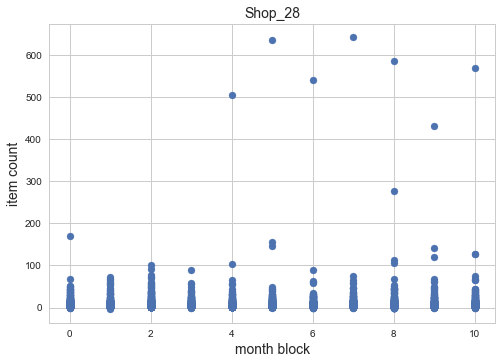

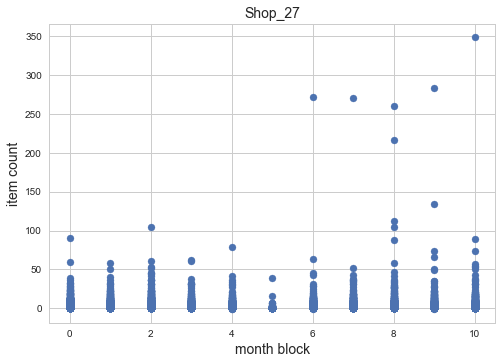

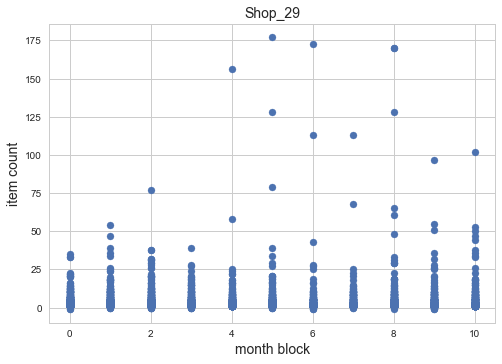

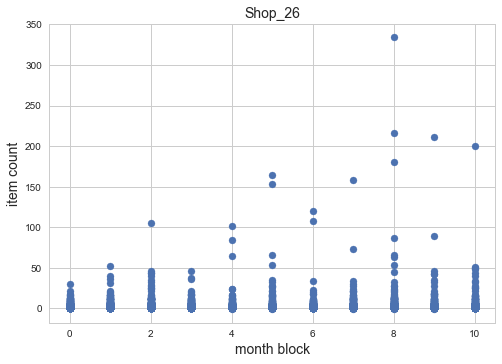

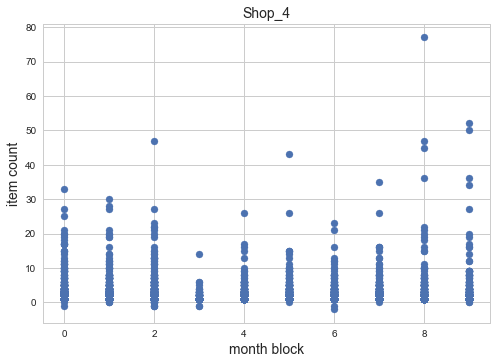

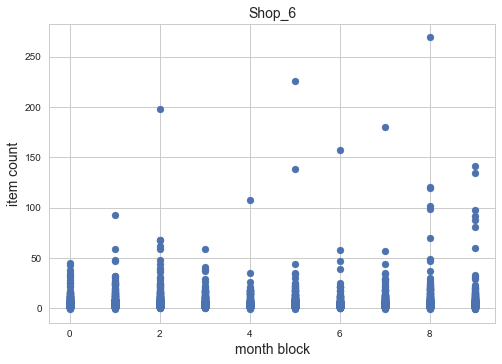

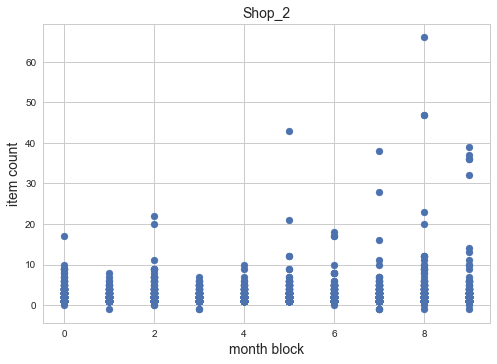

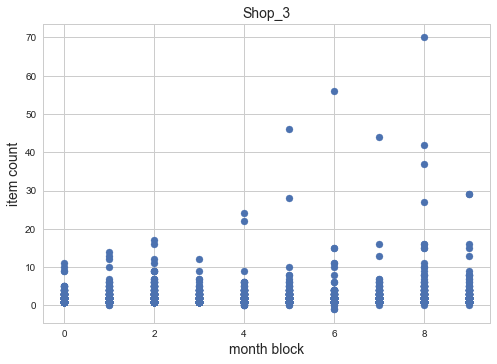

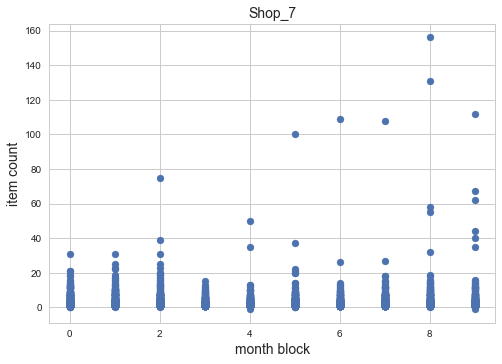

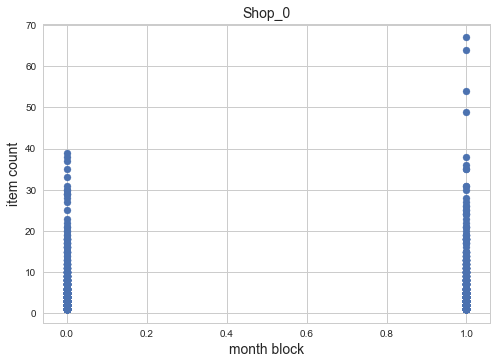

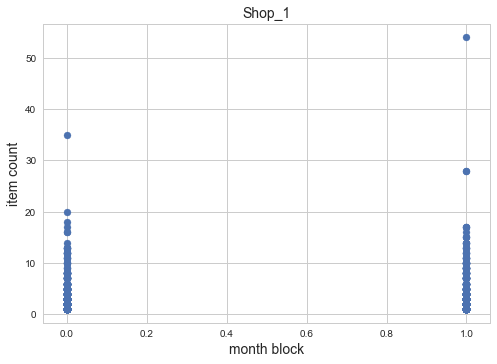

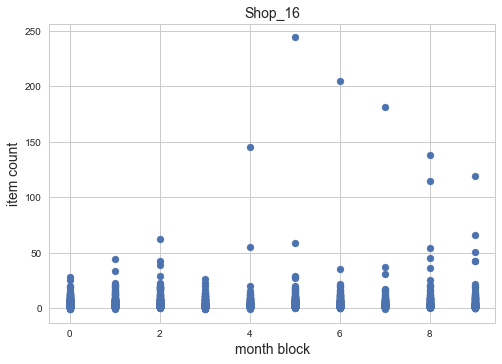

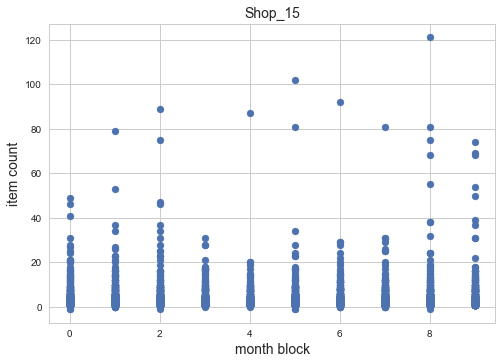

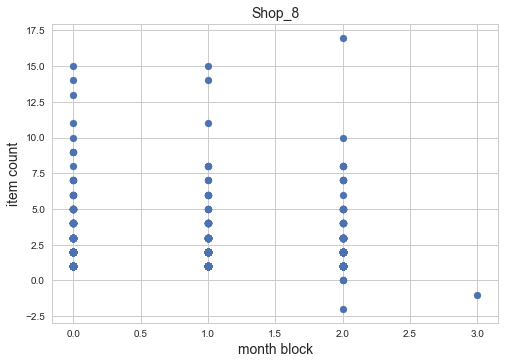

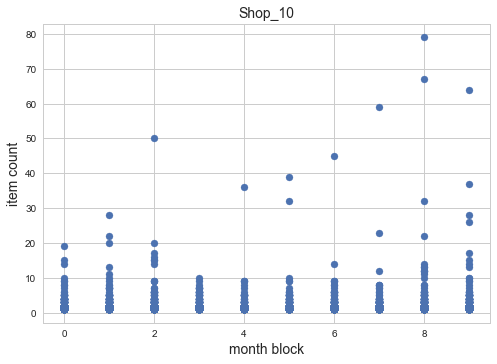

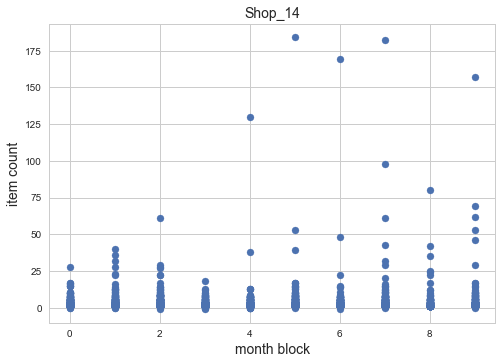

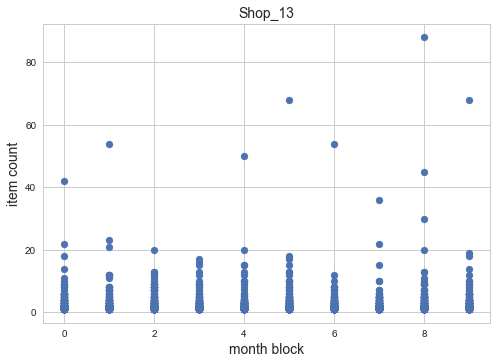

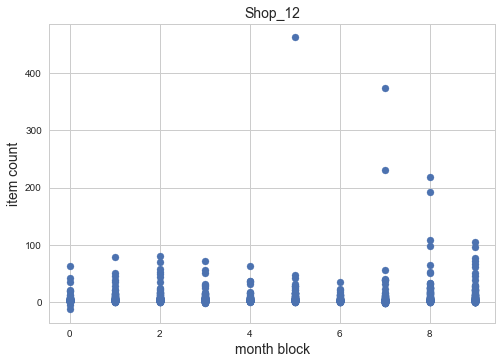

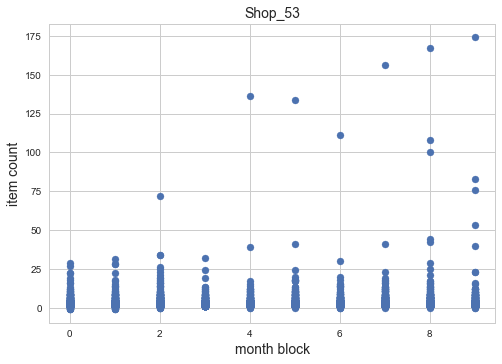

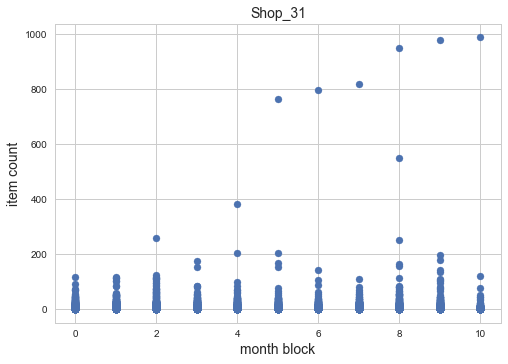

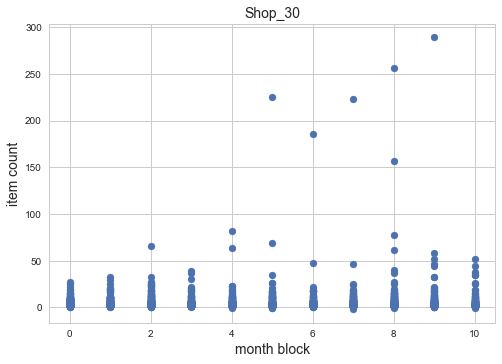

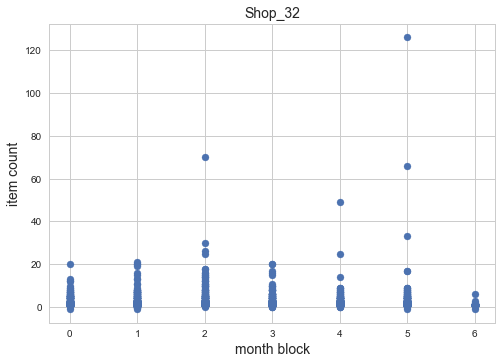

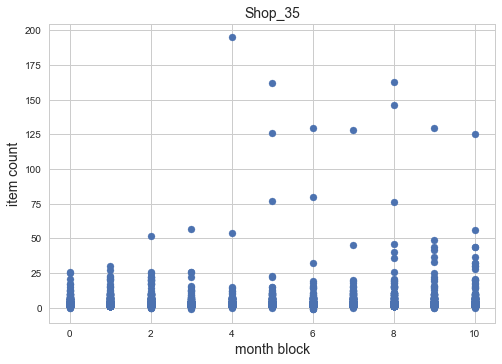

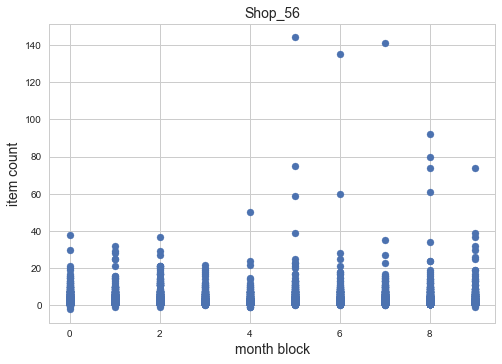

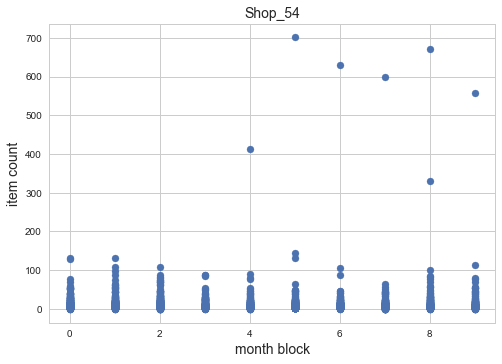

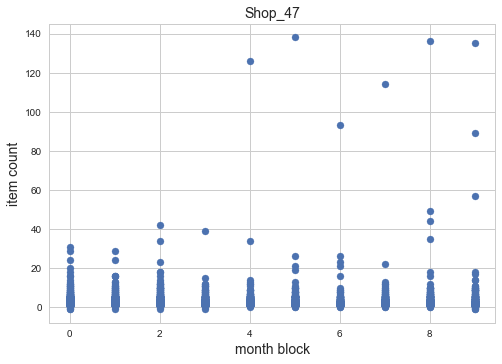

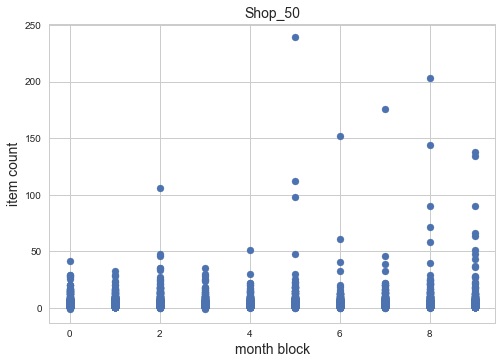

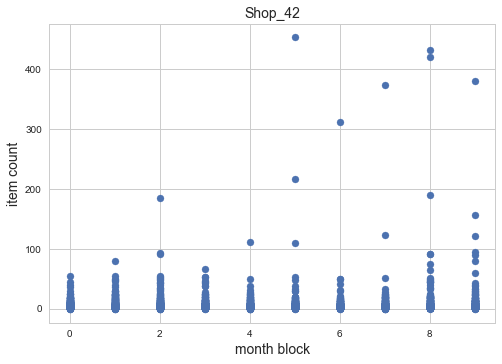

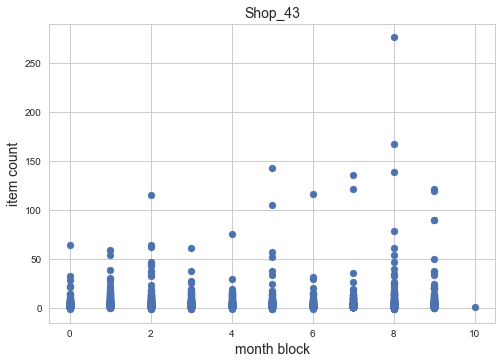

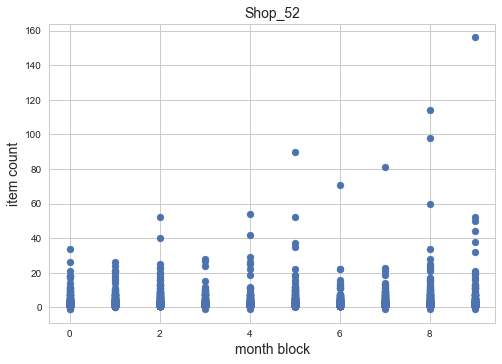

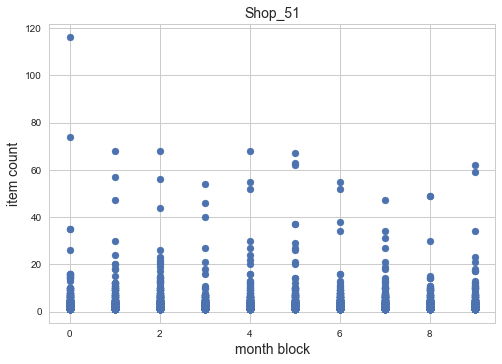

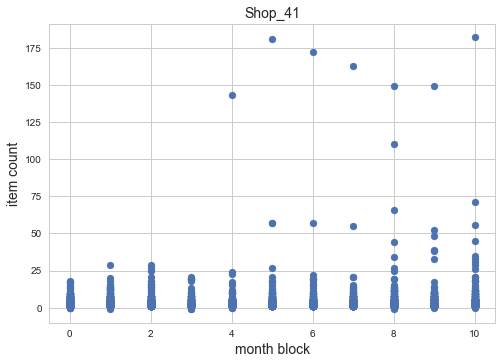

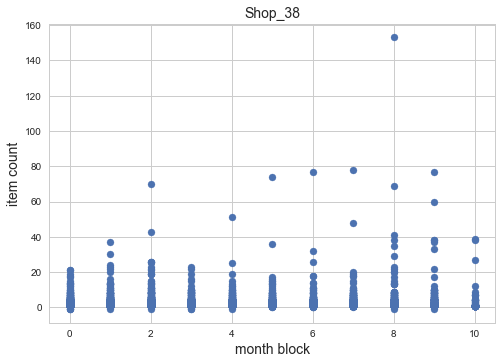

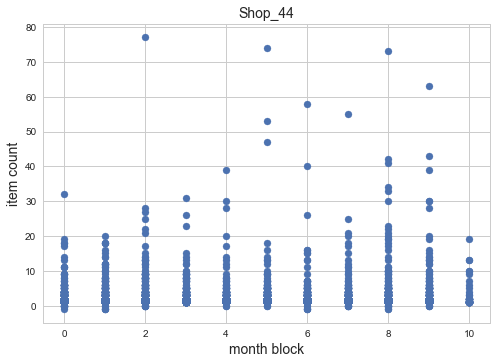

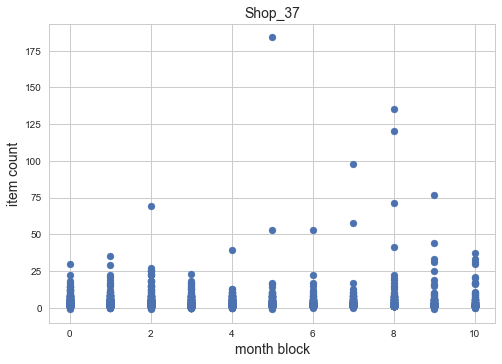

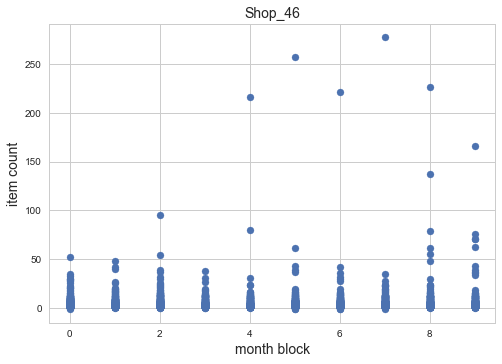

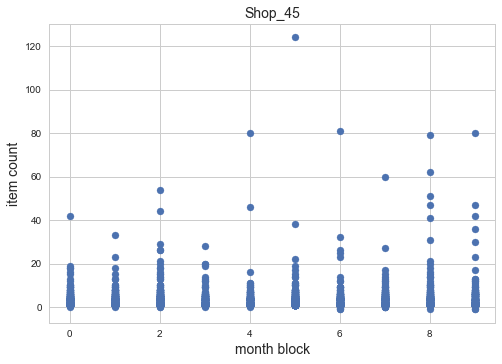

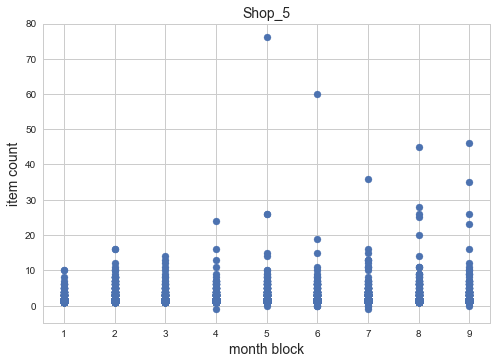

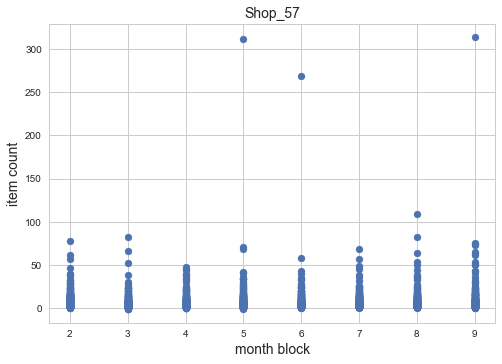

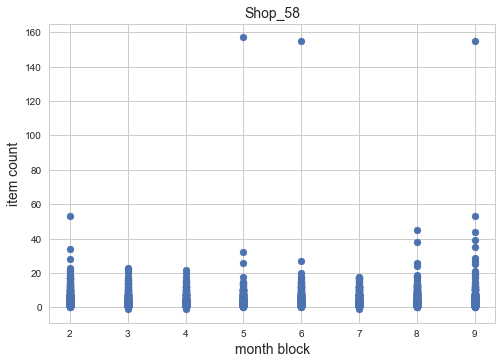

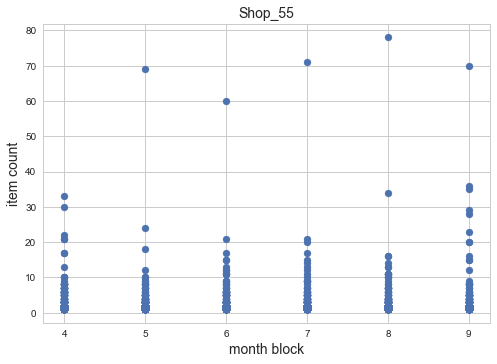

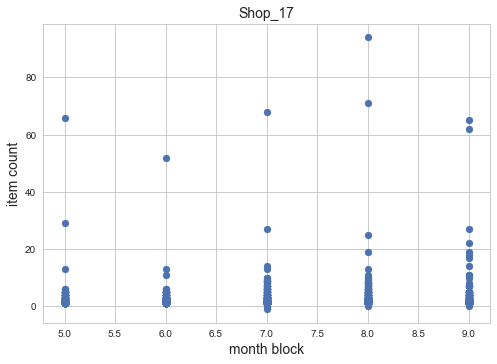

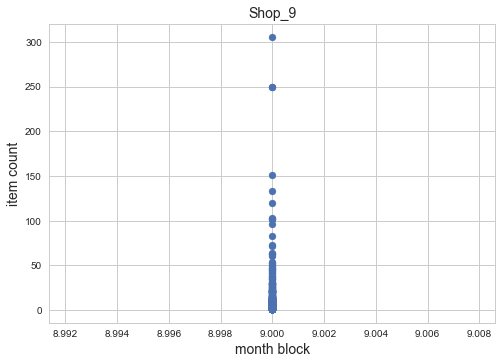

In [8]:
for shop in shops:
    plt.scatter(shopdf_agg[shop]['date_block_num'], shopdf_agg[shop]['item_cnt_agg'])
    graphTitle='Shop_'+str(shop)
    plt.title(graphTitle, fontsize=14)
    plt.xlabel('month block', fontsize=14)
    plt.ylabel('item count', fontsize=14)
    plt.grid(True)
    plt.show()
 


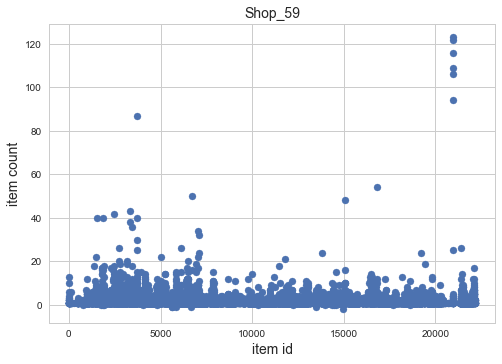

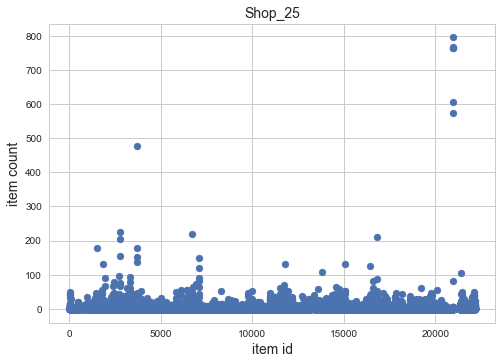

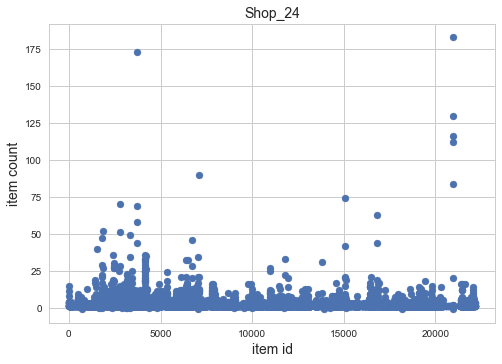

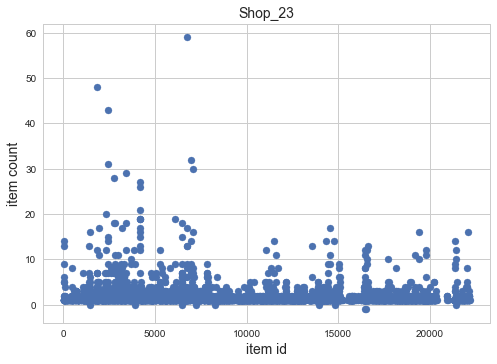

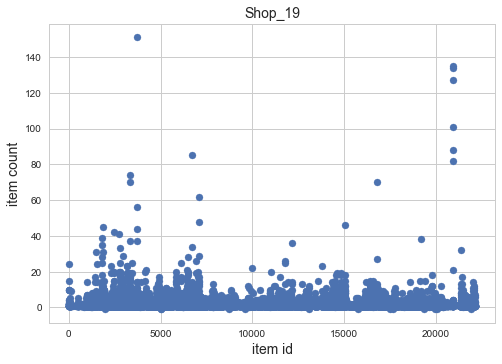

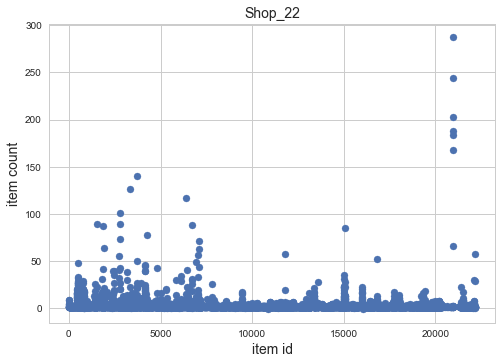

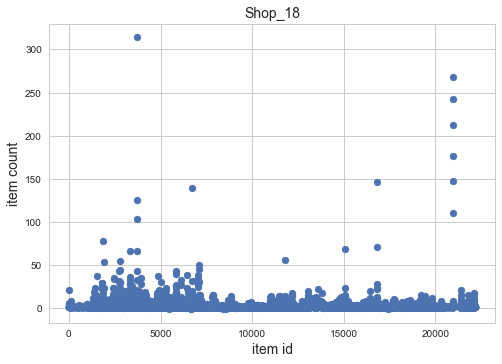

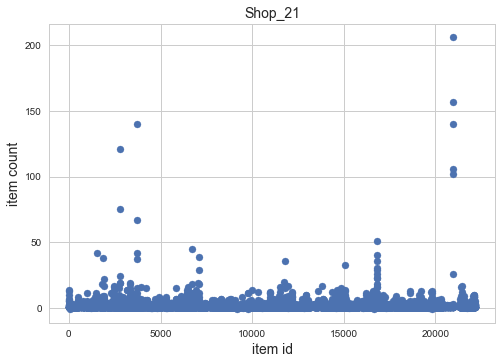

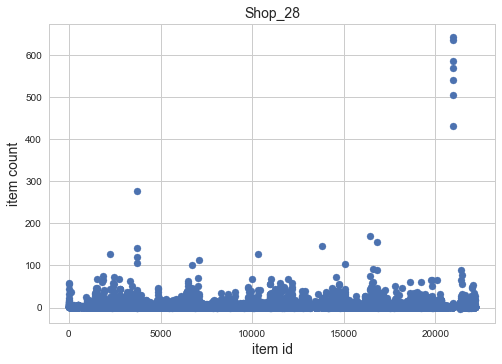

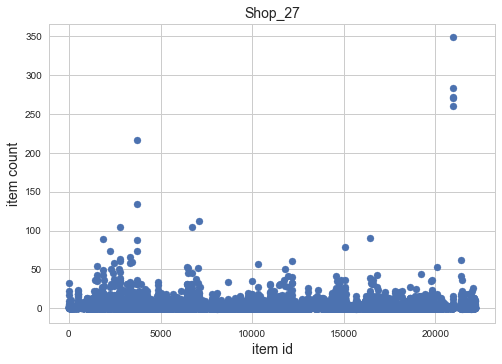

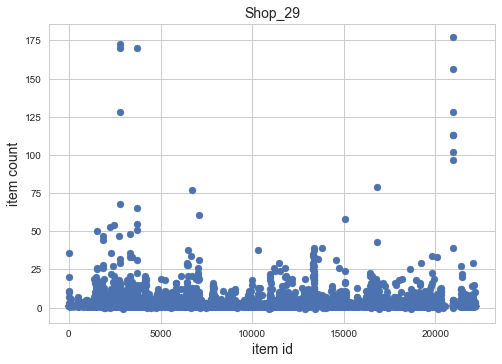

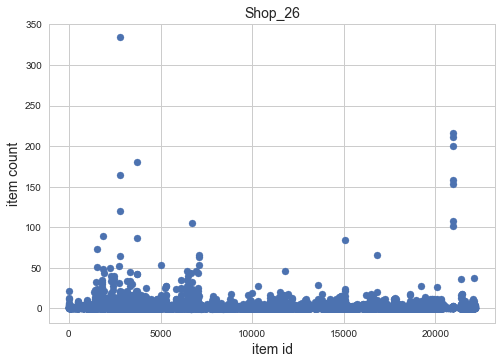

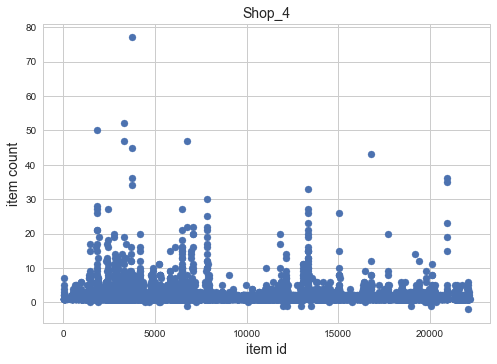

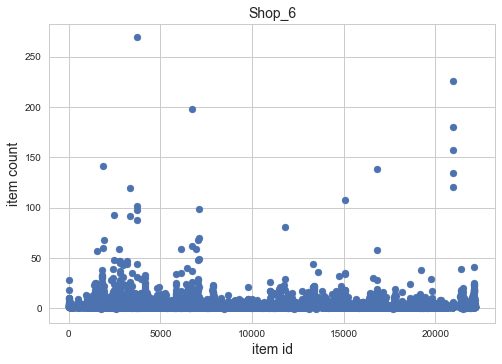

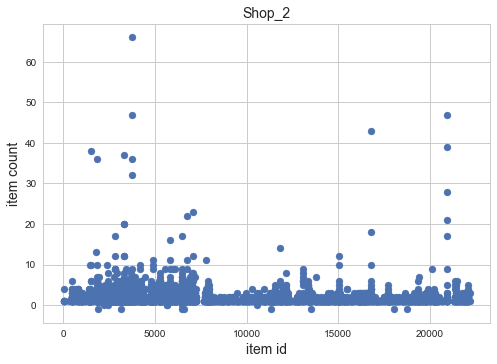

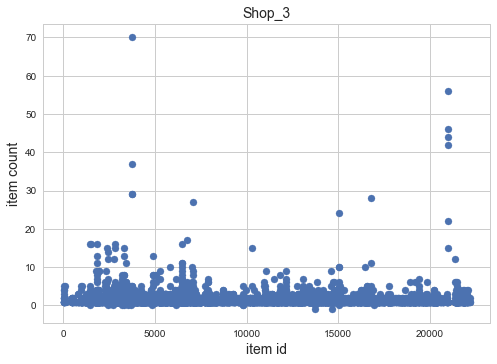

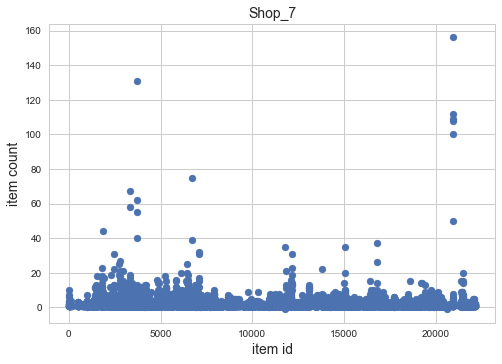

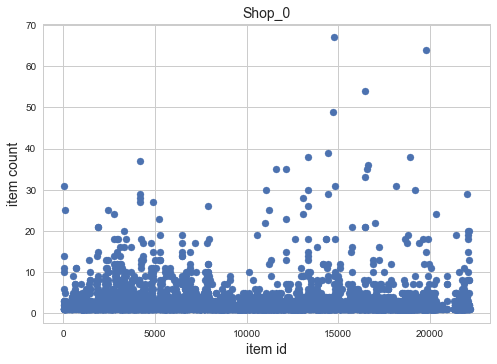

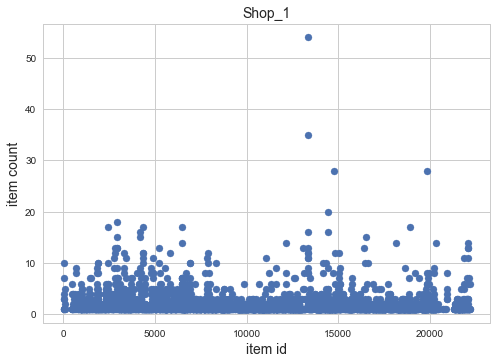

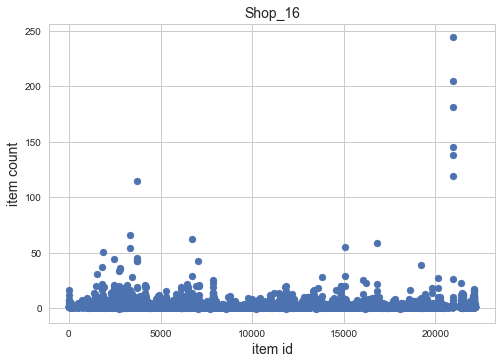

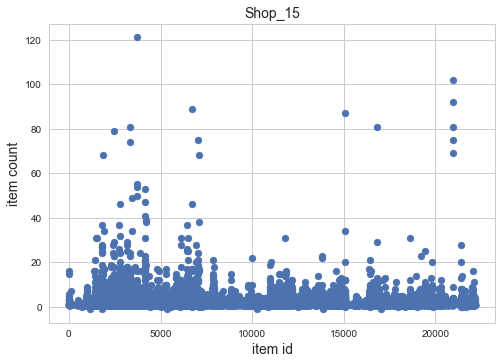

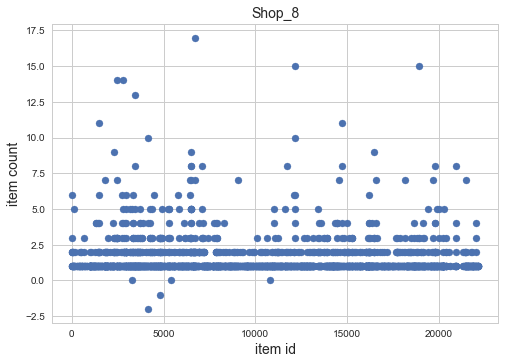

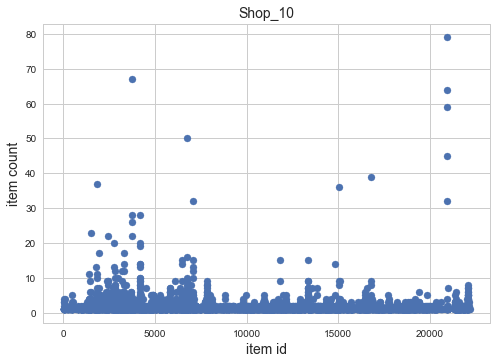

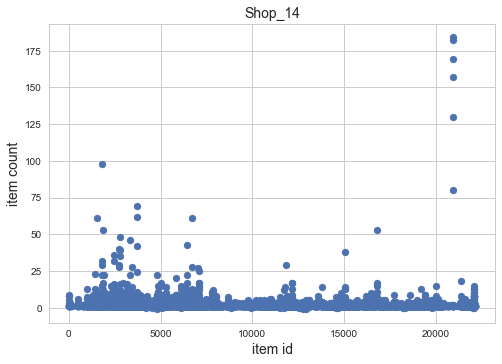

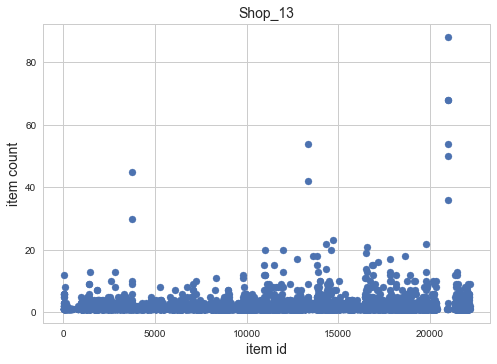

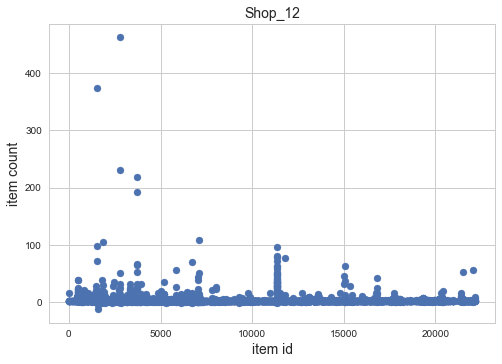

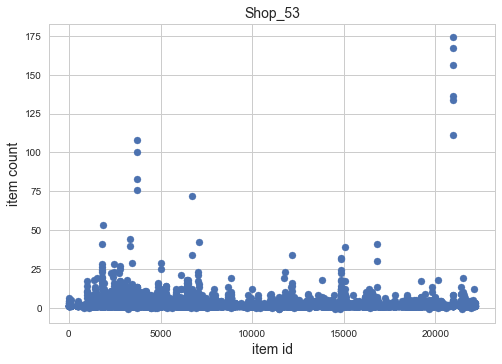

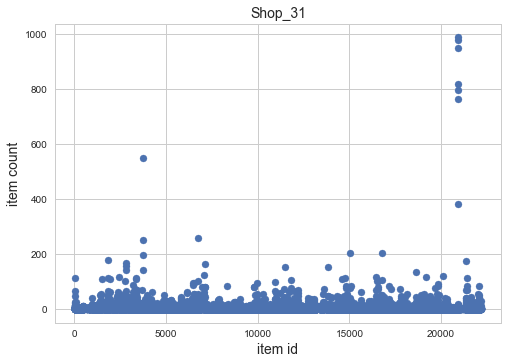

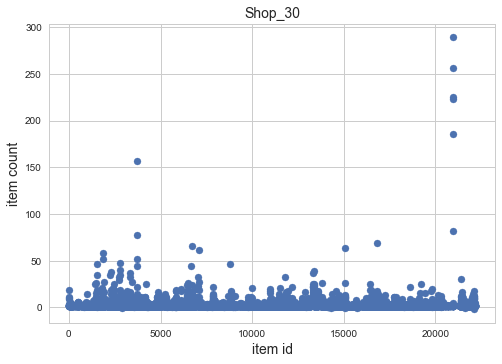

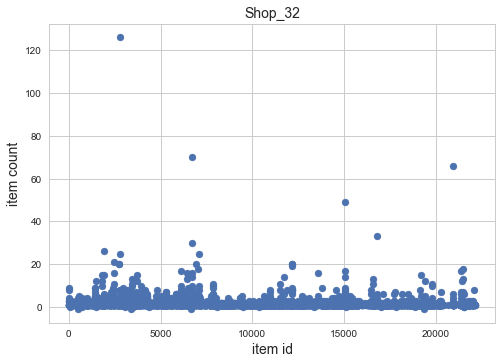

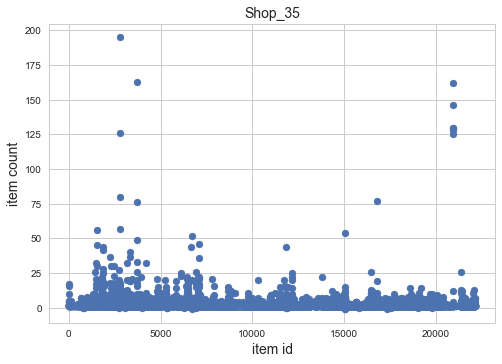

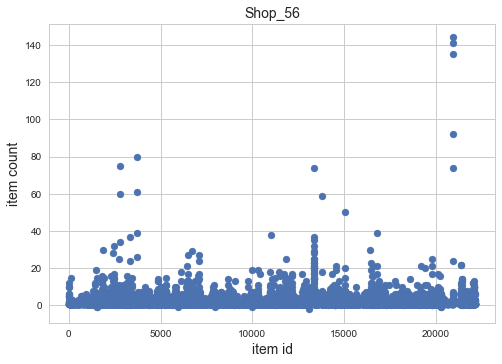

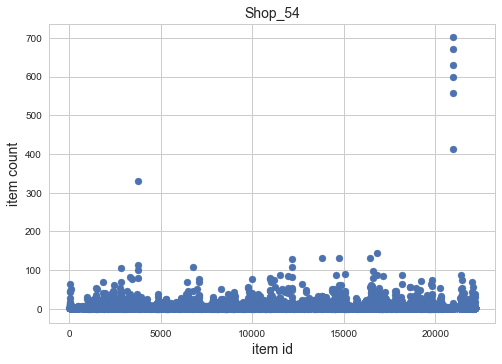

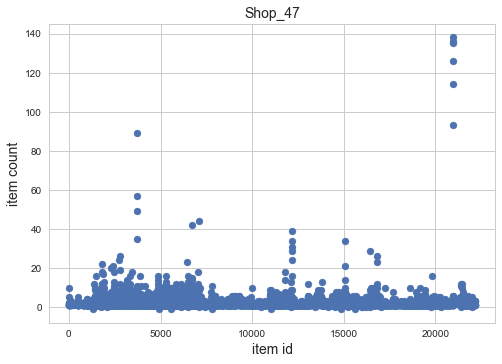

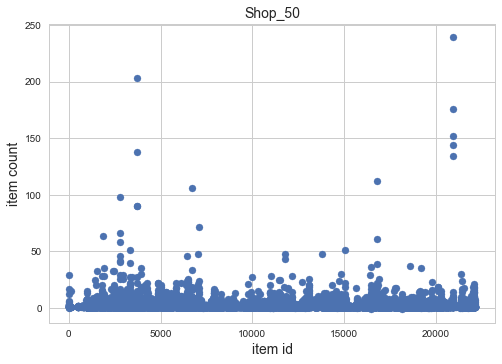

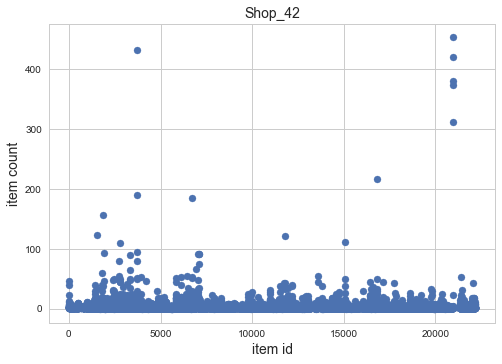

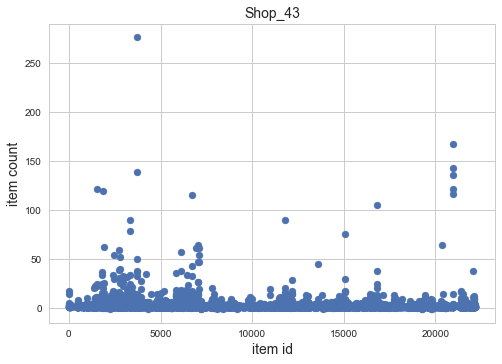

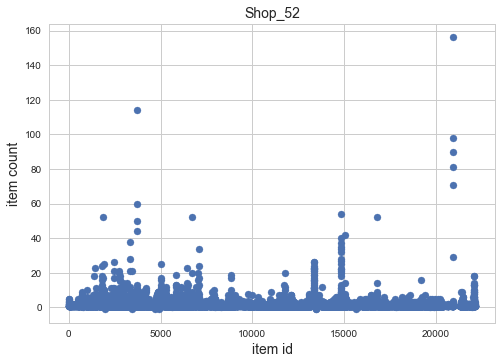

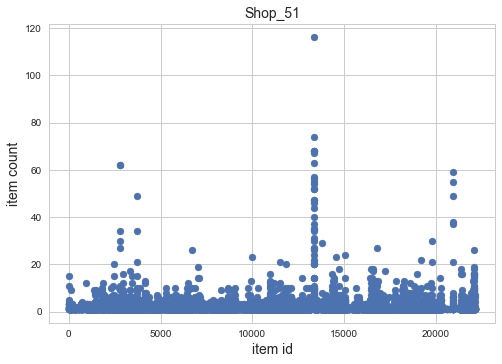

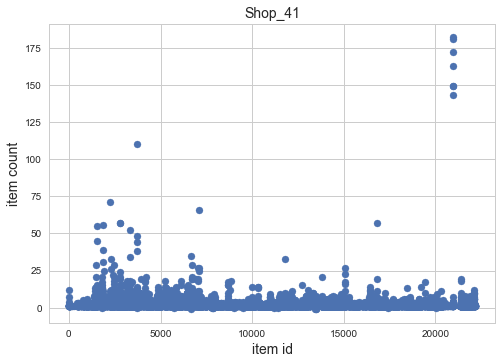

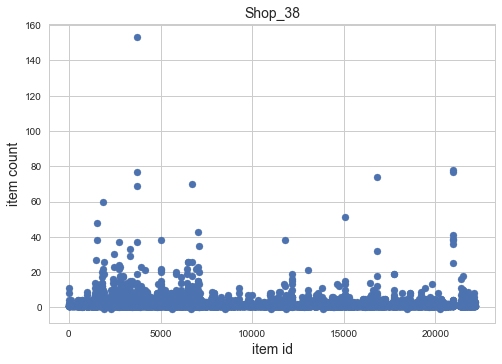

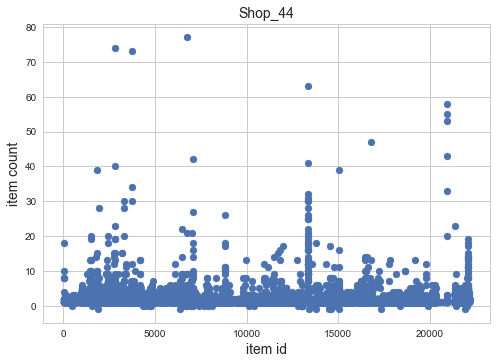

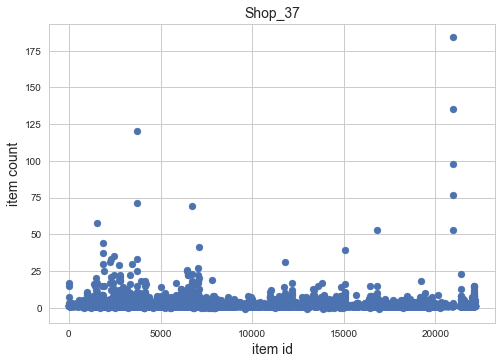

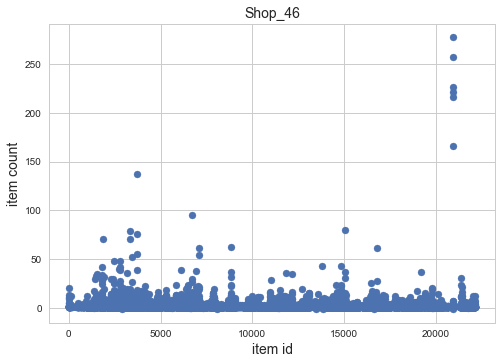

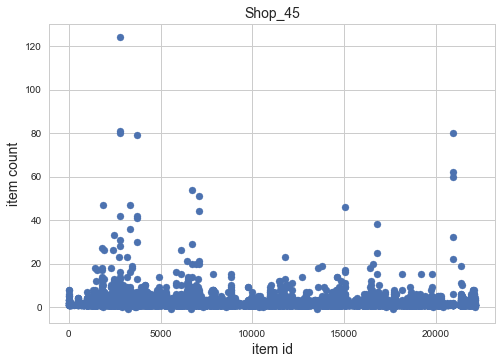

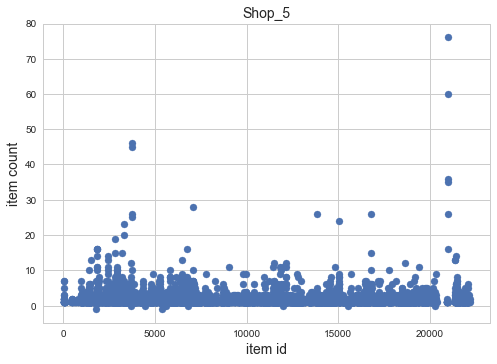

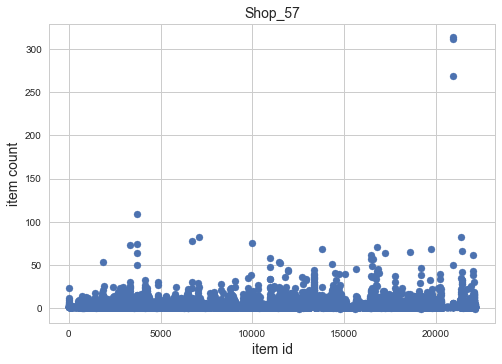

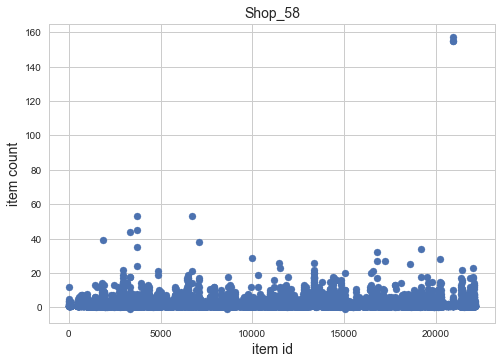

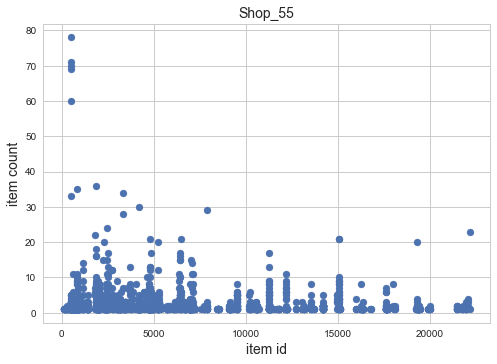

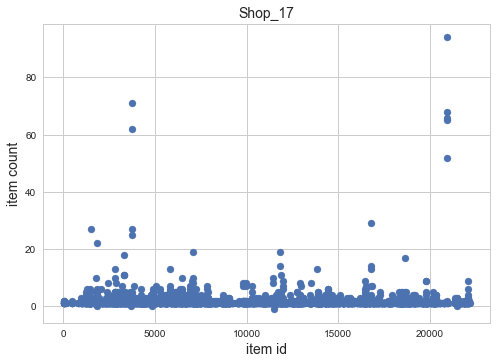

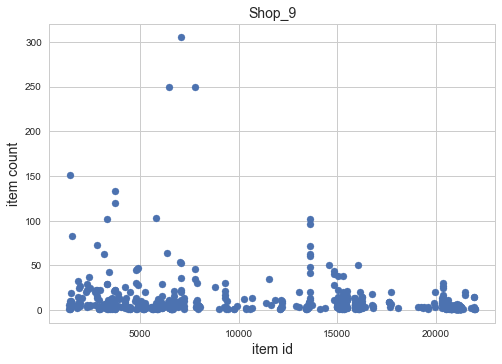

In [10]:
for shop in shops:
    plt.scatter(shopdf_agg[shop]['item_id'], shopdf_agg[shop]['item_cnt_agg'])
    graphTitle='Shop_'+str(shop)
    plt.title(graphTitle, fontsize=14)
    plt.xlabel('item id', fontsize=14)
    plt.ylabel('item count', fontsize=14)
    plt.grid(True)
    plt.show()
 

In [20]:
# with sklearn
skregr={}
for shop in shops:
    Title='Shop_'+str(shop)
    print(Title)
    X=shopdf_agg[shop][['date_block_num','item_id']]
    Y=shopdf_agg[shop][['item_cnt_agg']]
    regr = linear_model.LinearRegression()
    skregr[shop]=regr.fit(X, Y)
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)

Shop_59
Intercept: 
 [ 2.1549237]
Coefficients: 
 [[  2.05094012e-02  -2.65687646e-05]]
Shop_25
Intercept: 
 [ 2.57227432]
Coefficients: 
 [[  2.73050482e-02  -2.89585802e-06]]
Shop_24
Intercept: 
 [ 2.09149651]
Coefficients: 
 [[  9.78837626e-02  -4.26655762e-05]]
Shop_23
Intercept: 
 [ 2.20430489]
Coefficients: 
 [[  2.08322248e-02  -4.80667401e-05]]
Shop_19
Intercept: 
 [ 2.35520617]
Coefficients: 
 [[  1.45104674e-02  -3.85854582e-05]]
Shop_22
Intercept: 
 [ 2.81148106]
Coefficients: 
 [[  3.82623880e-02  -4.43295256e-05]]
Shop_18
Intercept: 
 [ 2.46224732]
Coefficients: 
 [[  3.63591053e-02  -4.40212137e-05]]
Shop_21
Intercept: 
 [ 1.59327902]
Coefficients: 
 [[  3.89146658e-02  -7.81623194e-06]]
Shop_28
Intercept: 
 [ 2.57997984]
Coefficients: 
 [[  3.87158467e-02   4.70784517e-06]]
Shop_27
Intercept: 
 [ 2.99484522]
Coefficients: 
 [[  2.34208781e-02  -4.68990349e-05]]
Shop_29
Intercept: 
 [ 2.29525573]
Coefficients: 
 [[  4.10965916e-02  -2.69357886e-05]]
Shop_26
Intercept: 
 [

In [21]:
# with statsmodels
smregr={}
for shop in shops:
    Title='Shop_'+str(shop)
    print(Title)
    X=shopdf_agg[shop][['date_block_num','item_id']]
    Y=shopdf_agg[shop][['item_cnt_agg']]
    X = sm.add_constant(X) # adding a constant
    smregr[shop] = sm.OLS(Y, X).fit()
    predictions = smregr[shop].predict(X) 
    print_model = smregr[shop].summary()
    print(print_model)

Shop_59
                            OLS Regression Results                            
Dep. Variable:           item_cnt_agg   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.049
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           0.000119
Time:                        21:10:58   Log-Likelihood:                -25369.
No. Observations:                9123   AIC:                         5.074e+04
Df Residuals:                    9120   BIC:                         5.076e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              2.1549      0.100